In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [3]:
#Importing the csv file
data = pd.read_excel('/content/INX_Future_Inc_Employee_Performance_CDS_Project2_Data_V1.8.xls')

In [4]:
data.shape

(1200, 28)

In [5]:
data.columns

Index(['EmpNumber', 'Age', 'Gender', 'EducationBackground', 'MaritalStatus',
       'EmpDepartment', 'EmpJobRole', 'BusinessTravelFrequency',
       'DistanceFromHome', 'EmpEducationLevel', 'EmpEnvironmentSatisfaction',
       'EmpHourlyRate', 'EmpJobInvolvement', 'EmpJobLevel',
       'EmpJobSatisfaction', 'NumCompaniesWorked', 'OverTime',
       'EmpLastSalaryHikePercent', 'EmpRelationshipSatisfaction',
       'TotalWorkExperienceInYears', 'TrainingTimesLastYear',
       'EmpWorkLifeBalance', 'ExperienceYearsAtThisCompany',
       'ExperienceYearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'Attrition', 'PerformanceRating'],
      dtype='object')

In [6]:
data.head()

EmpNumber  Age Gender EducationBackground MaritalStatus    EmpDepartment  \
0  E1001000   32   Male           Marketing        Single            Sales   
1  E1001006   47   Male           Marketing        Single            Sales   
2  E1001007   40   Male       Life Sciences       Married            Sales   
3  E1001009   41   Male     Human Resources      Divorced  Human Resources   
4  E1001010   60   Male           Marketing        Single            Sales   

        EmpJobRole BusinessTravelFrequency  DistanceFromHome  \
0  Sales Executive           Travel_Rarely                10   
1  Sales Executive           Travel_Rarely                14   
2  Sales Executive       Travel_Frequently                 5   
3          Manager           Travel_Rarely                10   
4  Sales Executive           Travel_Rarely                16   

   EmpEducationLevel  ...  EmpRelationshipSatisfaction  \
0                  3  ...                            4   
1                  4  ...                            4   
2                  4  ...                            3   
3                  4  ...                            2   
4                  4  ...                            4   

   TotalWorkExperienceInYears  TrainingTimesLastYear  EmpWorkLifeBalance  \
0                          10                      2                   2   
1                          20                      2                   3   
2                          20                      2                   3   
3                          23                      2                   2   
4                          10                      1                   3   

   ExperienceYearsAtThisCompany  ExperienceYearsInCurrentRole  \
0                            10                             7   
1                             7                             7   
2                            18                            13   
3                            21                             6   
4                             2                             2   

  YearsSinceLastPromotion  YearsWithCurrManager  Attrition  PerformanceRating  
0                       0                     8         No                  3  
1                       1                     7         No                  3  
2                       1                    12         No                  4  
3                      12                     6         No                  3  
4                       2                     2         No                  3  

[5 rows x 28 columns]

In [7]:
# Looking for missing data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 28 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   EmpNumber                     1200 non-null   object
 1   Age                           1200 non-null   int64 
 2   Gender                        1200 non-null   object
 3   EducationBackground           1200 non-null   object
 4   MaritalStatus                 1200 non-null   object
 5   EmpDepartment                 1200 non-null   object
 6   EmpJobRole                    1200 non-null   object
 7   BusinessTravelFrequency       1200 non-null   object
 8   DistanceFromHome              1200 non-null   int64 
 9   EmpEducationLevel             1200 non-null   int64 
 10  EmpEnvironmentSatisfaction    1200 non-null   int64 
 11  EmpHourlyRate                 1200 non-null   int64 
 12  EmpJobInvolvement             1200 non-null   int64 
 13  EmpJobLevel       

In [8]:
# A new pandas Dataframe is created to analyze department wise performance as asked.
dept = data.iloc[:,[5,27]].copy()
dept_per = dept.copy()

In [9]:
# Finding out the mean performance of all the departments and plotting its bar graph using seaborn.
dept_per.groupby(by='EmpDepartment')['PerformanceRating'].mean()

EmpDepartment
Data Science              3.050000
Development               3.085873
Finance                   2.775510
Human Resources           2.925926
Research & Development    2.921283
Sales                     2.860590
Name: PerformanceRating, dtype: float64

<Axes: xlabel='EmpDepartment', ylabel='PerformanceRating'>

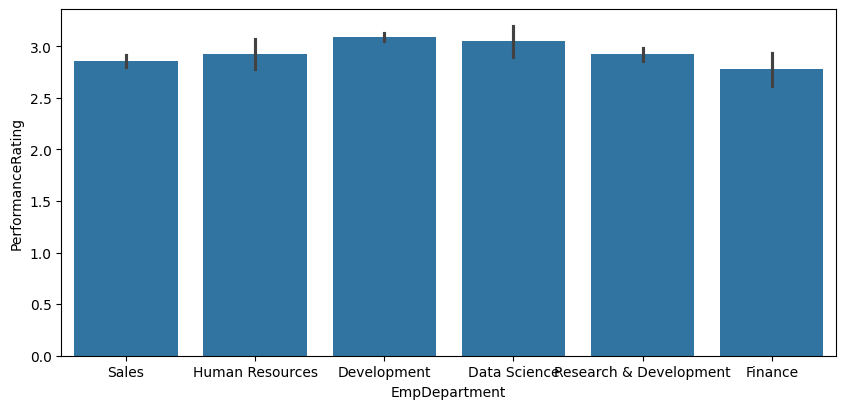

In [10]:
plt.figure(figsize=(10,4.5))
sns.barplot(x=dept_per['EmpDepartment'],y=dept_per['PerformanceRating'])

In [12]:
# Analyze each department separately
dept_per.groupby(by='EmpDepartment')['PerformanceRating'].value_counts()

EmpDepartment           PerformanceRating
Data Science            3                     17
                        4                      2
                        2                      1
Development             3                    304
                        4                     44
                        2                     13
Finance                 3                     30
                        2                     15
                        4                      4
Human Resources         3                     38
                        2                     10
                        4                      6
Research & Development  3                    234
                        2                     68
                        4                     41
Sales                   3                    251
                        2                     87
                        4                     35
Name: count, dtype: int64

In [13]:
# Creating a new dataframe to analyze each department separately
department = pd.get_dummies(dept_per['EmpDepartment'])
performance = pd.DataFrame(dept_per['PerformanceRating'])
dept_rating = pd.concat([department,performance],axis=1)

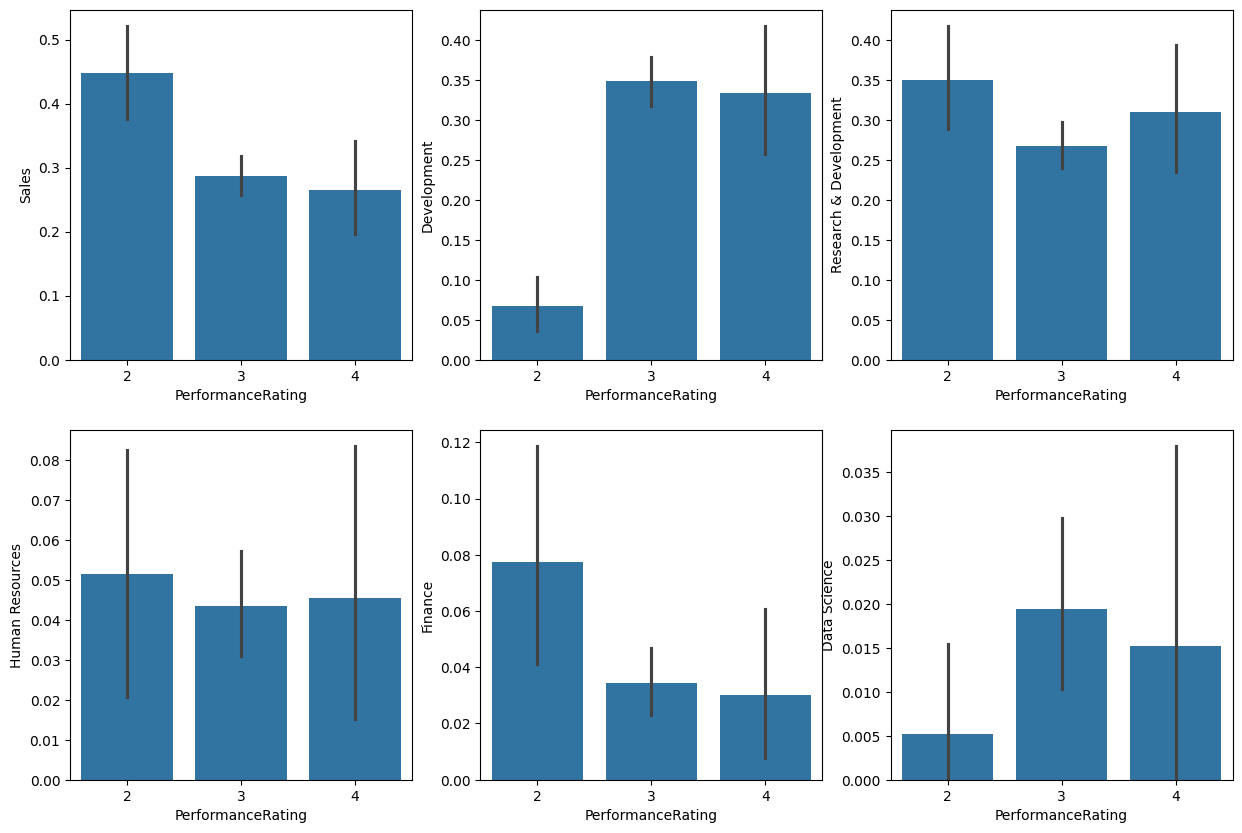

In [14]:
# Plotting a separate bar graph for performance of each department using seaborn
plt.figure(figsize=(15,10))
plt.subplot(2,3,1)
sns.barplot(x=dept_rating['PerformanceRating'],y=dept_rating['Sales'])
plt.subplot(2,3,2)
sns.barplot(x=dept_rating['PerformanceRating'],y=dept_rating['Development'])
plt.subplot(2,3,3)
sns.barplot(x=dept_rating['PerformanceRating'],y=dept_rating['Research & Development'])
plt.subplot(2,3,4)
sns.barplot(x=dept_rating['PerformanceRating'],y=dept_rating['Human Resources'])
plt.subplot(2,3,5)
sns.barplot(x=dept_rating['PerformanceRating'],y=dept_rating['Finance'])
plt.subplot(2,3,6)
sns.barplot(x=dept_rating['PerformanceRating'],y=dept_rating['Data Science'])
plt.show()

In [15]:
# Encoding all the ordinal columns and creating a dummy variable for them to see if there are any effects on Performance Rating
enc = LabelEncoder()
for i in (2,3,4,5,6,7,16,26):
    data.iloc[:,i] = enc.fit_transform(data.iloc[:,i])
data.head()

EmpNumber  Age Gender EducationBackground MaritalStatus EmpDepartment  \
0  E1001000   32      1                   2             2             5   
1  E1001006   47      1                   2             2             5   
2  E1001007   40      1                   1             1             5   
3  E1001009   41      1                   0             0             3   
4  E1001010   60      1                   2             2             5   

  EmpJobRole BusinessTravelFrequency  DistanceFromHome  EmpEducationLevel  \
0         13                       2                10                  3   
1         13                       2                14                  4   
2         13                       1                 5                  4   
3          8                       2                10                  4   
4         13                       2                16                  4   

   ...  EmpRelationshipSatisfaction  TotalWorkExperienceInYears  \
0  ...                            4                          10   
1  ...                            4                          20   
2  ...                            3                          20   
3  ...                            2                          23   
4  ...                            4                          10   

   TrainingTimesLastYear  EmpWorkLifeBalance  ExperienceYearsAtThisCompany  \
0                      2                   2                            10   
1                      2                   3                             7   
2                      2                   3                            18   
3                      2                   2                            21   
4                      1                   3                             2   

   ExperienceYearsInCurrentRole YearsSinceLastPromotion  YearsWithCurrManager  \
0                             7                       0                     8   
1                             7                       1                     7   
2                            13                       1                    12   
3                             6                      12                     6   
4                             2                       2                     2   

   Attrition  PerformanceRating  
0          0                  3  
1          0                  3  
2          0                  4  
3          0                  3  
4          0                  3  

[5 rows x 28 columns]

In [16]:
# Exclude non-numeric columns
data_numeric = data.select_dtypes(include=['float64', 'int64'])

# Calculate correlation for numeric columns only
correlation_matrix = data_numeric.corr()

# Display the correlation matrix
print(correlation_matrix)


                                   Age  DistanceFromHome  EmpEducationLevel  \
Age                           1.000000          0.020937           0.207313   
DistanceFromHome              0.020937          1.000000           0.045856   
EmpEducationLevel             0.207313          0.045856           1.000000   
EmpEnvironmentSatisfaction    0.013814         -0.017719          -0.037103   
EmpHourlyRate                 0.062867          0.013730           0.014095   
EmpJobInvolvement             0.027216          0.003231           0.027544   
EmpJobLevel                   0.509139          0.017270           0.100734   
EmpJobSatisfaction           -0.002436         -0.003036           0.000357   
NumCompaniesWorked            0.284408         -0.021411           0.128674   
EmpLastSalaryHikePercent     -0.006105          0.044974           0.002358   
EmpRelationshipSatisfaction   0.049749         -0.009509          -0.016690   
TotalWorkExperienceInYears    0.680886          0.02

In [17]:
# Dropping the first columns as it is of no use for analysis.
data.drop(['EmpNumber'],inplace=True,axis=1)

In [18]:
data.head()

Age Gender EducationBackground MaritalStatus EmpDepartment EmpJobRole  \
0   32      1                   2             2             5         13   
1   47      1                   2             2             5         13   
2   40      1                   1             1             5         13   
3   41      1                   0             0             3          8   
4   60      1                   2             2             5         13   

  BusinessTravelFrequency  DistanceFromHome  EmpEducationLevel  \
0                       2                10                  3   
1                       2                14                  4   
2                       1                 5                  4   
3                       2                10                  4   
4                       2                16                  4   

   EmpEnvironmentSatisfaction  ...  EmpRelationshipSatisfaction  \
0                           4  ...                            4   
1                           4  ...                            4   
2                           4  ...                            3   
3                           2  ...                            2   
4                           1  ...                            4   

   TotalWorkExperienceInYears  TrainingTimesLastYear  EmpWorkLifeBalance  \
0                          10                      2                   2   
1                          20                      2                   3   
2                          20                      2                   3   
3                          23                      2                   2   
4                          10                      1                   3   

   ExperienceYearsAtThisCompany ExperienceYearsInCurrentRole  \
0                            10                            7   
1                             7                            7   
2                            18                           13   
3                            21                            6   
4                             2                            2   

   YearsSinceLastPromotion  YearsWithCurrManager  Attrition  PerformanceRating  
0                        0                     8          0                  3  
1                        1                     7          0                  3  
2                        1                    12          0                  4  
3                       12                     6          0                  3  
4                        2                     2          0                  3  

[5 rows x 27 columns]

In [19]:
# Here we have selected only the important columns
y = data.PerformanceRating
#X = data.iloc[:,0:-1]  All predictors were selected it resulted in dropping of accuracy.
X = data.iloc[:,[4,5,9,16,20,21,22,23,24]] # Taking only variables with correlation coeffecient greater than 0.1
X.head()

EmpDepartment EmpJobRole  EmpEnvironmentSatisfaction  \
0             5         13                           4   
1             5         13                           4   
2             5         13                           4   
3             3          8                           2   
4             5         13                           1   

   EmpLastSalaryHikePercent  EmpWorkLifeBalance  ExperienceYearsAtThisCompany  \
0                        12                   2                            10   
1                        12                   3                             7   
2                        21                   3                            18   
3                        15                   2                            21   
4                        14                   3                             2   

   ExperienceYearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  
0                             7                        0                     8  
1                             7                        1                     7  
2                            13                        1                    12  
3                             6                       12                     6  
4                             2                        2                     2

In [20]:
# Splitting into train and test for calculating the accuracy
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=10)

In [21]:
# Standardization technique is used
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [22]:
X_train.shape

(840, 9)

In [23]:
X_test.shape

(360, 9)

In [24]:
# Training the model
from sklearn.linear_model import LogisticRegression
model_logr = LogisticRegression()
model_logr.fit(X_train,y_train)

LogisticRegression()

In [25]:
# Predicting the model
y_predict_log = model_logr.predict(X_test)

In [26]:
# Finding accuracy, precision, recall and confusion matrix
print(accuracy_score(y_test,y_predict_log))
print(classification_report(y_test,y_predict_log))

0.8333333333333334
              precision    recall  f1-score   support

           2       0.65      0.48      0.55        63
           3       0.86      0.94      0.90       264
           4       0.81      0.67      0.73        33

    accuracy                           0.83       360
   macro avg       0.78      0.69      0.73       360
weighted avg       0.82      0.83      0.82       360



In [27]:
confusion_matrix(y_test,y_predict_log)

array([[ 30,  30,   3],
       [ 14, 248,   2],
       [  2,   9,  22]])

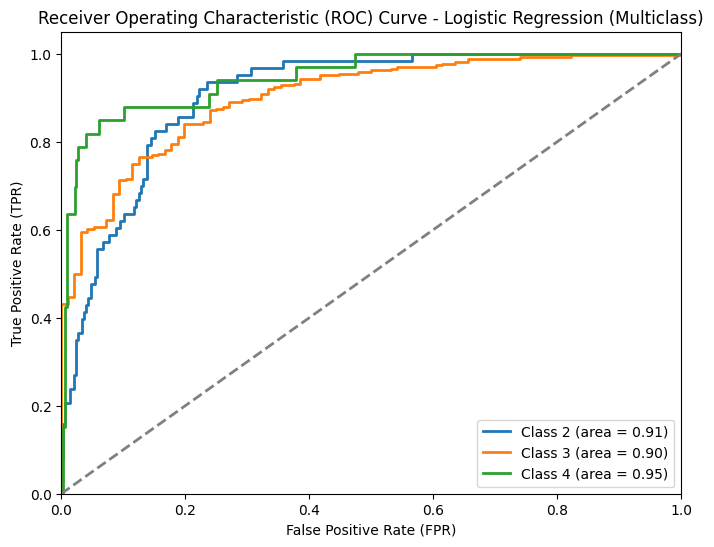

In [28]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.linear_model import LogisticRegression

# Train the Logistic Regression model
model_logr = LogisticRegression(max_iter=1000)  # Ensure sufficient iterations
model_logr.fit(X_train, y_train)

# Binarize the multiclass labels (for One-vs-Rest ROC)
y_test_bin = label_binarize(y_test, classes=[2, 3, 4])  # Update with your classes if different
n_classes = y_test_bin.shape[1]

# Get predicted probabilities for all classes
y_prob_log = model_logr.predict_proba(X_test)

# Initialize the plot
plt.figure(figsize=(8, 6))

# Compute and plot ROC curve for each class
for i in range(n_classes):
    fpr, tpr, thresholds = roc_curve(y_test_bin[:, i], y_prob_log[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label='Class {0} (area = {1:.2f})'.format(i+2, roc_auc))  # Update class names as per your data

# Plot the diagonal line (random classifier)
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')

# Customize the plot
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve - Logistic Regression (Multiclass)')
plt.legend(loc='lower right')
plt.show()


In [29]:
# Training the model
from sklearn.svm import SVC
rbf_svc = SVC(kernel='rbf', C=100, random_state=10).fit(X_train,y_train)

In [30]:
# Predicting the model
y_predict_svm = rbf_svc.predict(X_test)

In [31]:
# Finding accuracy, precision, recall and confusion matrix
print(accuracy_score(y_test,y_predict_svm))
print(classification_report(y_test,y_predict_svm))

0.8444444444444444
              precision    recall  f1-score   support

           2       0.74      0.78      0.76        63
           3       0.92      0.88      0.90       264
           4       0.54      0.67      0.59        33

    accuracy                           0.84       360
   macro avg       0.73      0.78      0.75       360
weighted avg       0.85      0.84      0.85       360



In [32]:
confusion_matrix(y_test,y_predict_svm)

array([[ 49,  13,   1],
       [ 13, 233,  18],
       [  4,   7,  22]])

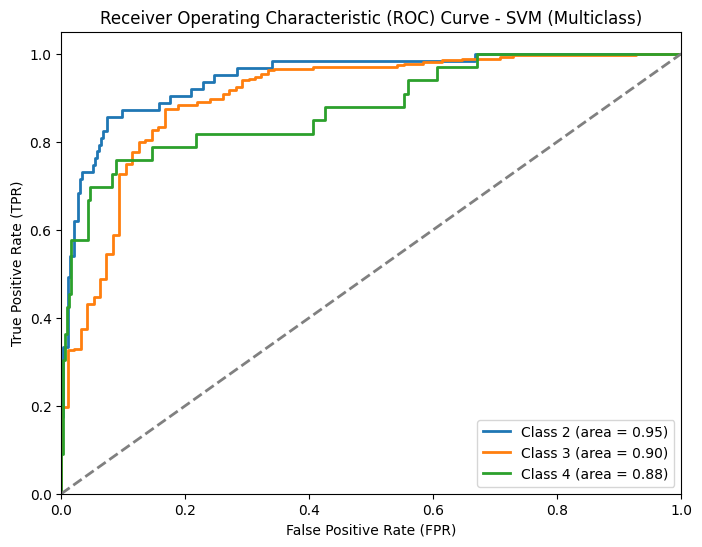

In [33]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.svm import SVC

# Train the SVM model with RBF kernel
rbf_svc = SVC(kernel='rbf', C=100, random_state=10, probability=True)  # Ensure probability=True for predict_proba
rbf_svc.fit(X_train, y_train)

# Binarize the multiclass labels (for One-vs-Rest ROC)
y_test_bin = label_binarize(y_test, classes=[2, 3, 4])  # Update with your classes if different
n_classes = y_test_bin.shape[1]

# Get predicted probabilities for all classes
y_prob_svm = rbf_svc.predict_proba(X_test)

# Initialize the plot
plt.figure(figsize=(8, 6))

# Compute and plot ROC curve for each class
for i in range(n_classes):
    fpr, tpr, thresholds = roc_curve(y_test_bin[:, i], y_prob_svm[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label='Class {0} (area = {1:.2f})'.format(i+2, roc_auc))  # Update class names as per your data

# Plot the diagonal line (random classifier)
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')

# Customize the plot
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve - SVM (Multiclass)')
plt.legend(loc='lower right')
plt.show()


In [34]:
# Training the model
from sklearn.tree import DecisionTreeClassifier

classifier_dtg=DecisionTreeClassifier(random_state=42,splitter='best')
parameters=[{'min_samples_split':[2,3,4,5],'criterion':['gini']},{'min_samples_split':[2,3,4,5],'criterion':['entropy']}]

model_griddtree=GridSearchCV(estimator=classifier_dtg, param_grid=parameters, scoring='accuracy',cv=10)
model_griddtree.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=42),
             param_grid=[{'criterion': ['gini'],
                          'min_samples_split': [2, 3, 4, 5]},
                         {'criterion': ['entropy'],
                          'min_samples_split': [2, 3, 4, 5]}],
             scoring='accuracy')

In [35]:
model_griddtree.best_params_

{'criterion': 'entropy', 'min_samples_split': 5}

In [36]:
# Predicting the model
y_predict_dtree = model_griddtree.predict(X_test)

In [37]:
# Finding accuracy, precision, recall and confusion matrix
print(accuracy_score(y_test,y_predict_dtree))
print(classification_report(y_test,y_predict_dtree))

0.9055555555555556
              precision    recall  f1-score   support

           2       0.85      0.83      0.84        63
           3       0.94      0.95      0.94       264
           4       0.75      0.73      0.74        33

    accuracy                           0.91       360
   macro avg       0.85      0.83      0.84       360
weighted avg       0.90      0.91      0.90       360



In [38]:
confusion_matrix(y_test,y_predict_dtree)

array([[ 52,  10,   1],
       [  7, 250,   7],
       [  2,   7,  24]])

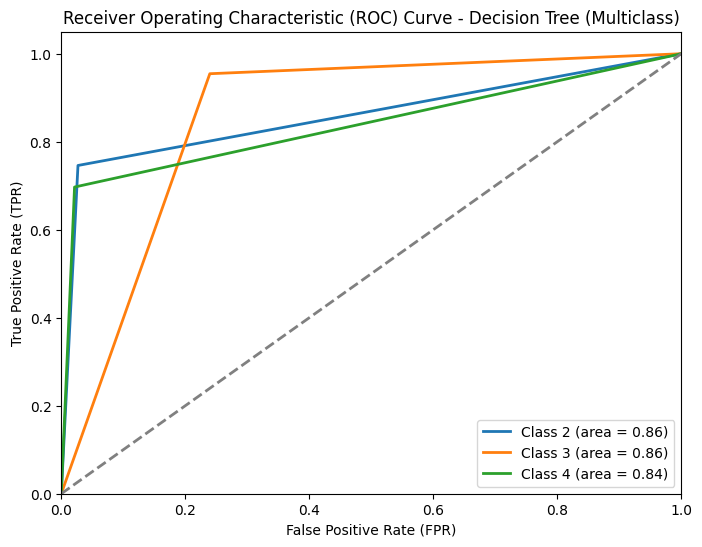

In [39]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.tree import DecisionTreeClassifier

# Train your Decision Tree model
classifier_dtg = DecisionTreeClassifier(random_state=42, splitter='best')
classifier_dtg.fit(X_train, y_train)

# Binarize the multiclass labels (for One-vs-Rest ROC)
y_test_bin = label_binarize(y_test, classes=[2, 3, 4])  # Update with your classes if different
n_classes = y_test_bin.shape[1]

# Get predicted probabilities for all classes
y_prob_dtree = classifier_dtg.predict_proba(X_test)

# Initialize the plot
plt.figure(figsize=(8, 6))

# Compute and plot ROC curve for each class
for i in range(n_classes):
    fpr, tpr, thresholds = roc_curve(y_test_bin[:, i], y_prob_dtree[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label='Class {0} (area = {1:.2f})'.format(i+2, roc_auc))  # Update class names as per your data

# Plot the diagonal line (random classifier)
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')

# Customize the plot
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve - Decision Tree (Multiclass)')
plt.legend(loc='lower right')
plt.show()


In [40]:
# Training the model
from sklearn.ensemble import RandomForestClassifier

classifier_rfg=RandomForestClassifier(random_state=33,n_estimators=23)
parameters=[{'min_samples_split':[2,3,4,5],'criterion':['gini','entropy'],'min_samples_leaf':[1,2,3]}]

model_gridrf=GridSearchCV(estimator=classifier_rfg, param_grid=parameters, scoring='accuracy',cv=10)
model_gridrf.fit(X_train,y_train)

GridSearchCV(cv=10,
             estimator=RandomForestClassifier(n_estimators=23, random_state=33),
             param_grid=[{'criterion': ['gini', 'entropy'],
                          'min_samples_leaf': [1, 2, 3],
                          'min_samples_split': [2, 3, 4, 5]}],
             scoring='accuracy')

In [41]:
model_gridrf.best_params_

{'criterion': 'gini', 'min_samples_leaf': 1, 'min_samples_split': 4}

In [42]:
# Predicting the model
y_predict_rf = model_gridrf.predict(X_test)

In [57]:
confusion_matrix(y_test,y_predict_rf)

array([[ 56,   7,   0],
       [  4, 255,   5],
       [  1,   8,  24]])

In [43]:
# Finding accuracy, precision, recall and confusion matrix
print(accuracy_score(y_test,y_predict_rf))
print(classification_report(y_test,y_predict_rf))

0.9305555555555556
              precision    recall  f1-score   support

           2       0.92      0.89      0.90        63
           3       0.94      0.97      0.96       264
           4       0.83      0.73      0.77        33

    accuracy                           0.93       360
   macro avg       0.90      0.86      0.88       360
weighted avg       0.93      0.93      0.93       360



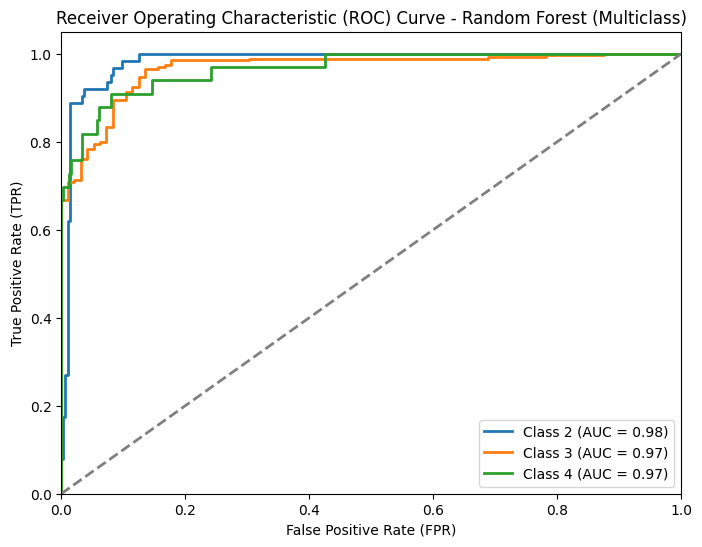

In [44]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Define the RandomForestClassifier model
rf_model = RandomForestClassifier(random_state=42)

# Define the parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10]   # Minimum number of samples required to split a node
}

# Create a GridSearchCV object with 5-fold cross-validation
grid_search_rf = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='accuracy')

# Train the model
grid_search_rf.fit(X_train, y_train)

# Get the best model from GridSearchCV
model_gridrf = grid_search_rf.best_estimator_

# Now, the model is trained and ready to make predictions and plot the ROC curve
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# Ensure the model is correctly trained (you have 'model_gridrf' after the previous step)
# Get predicted probabilities for all classes (this will give probabilities for each class)
y_prob_rf = model_gridrf.predict_proba(X_test)

# Binarize the multiclass labels (One-vs-Rest for multiclass ROC)
y_test_bin = label_binarize(y_test, classes=[2, 3, 4])  # Adjust the classes according to your dataset
n_classes = y_test_bin.shape[1]

# Initialize the plot
plt.figure(figsize=(8, 6))

# Compute and plot ROC curve for each class
for i in range(n_classes):
    fpr, tpr, thresholds = roc_curve(y_test_bin[:, i], y_prob_rf[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f'Class {i+2} (AUC = {roc_auc:.2f})')  # Adjust class labels if necessary

# Plot the diagonal line (random classifier)
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')

# Customize the plot
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve - Random Forest (Multiclass)')
plt.legend(loc='lower right')
plt.show()


In [45]:
# Training the model
from sklearn.neighbors import KNeighborsClassifier
model_knn = KNeighborsClassifier(n_neighbors=10,metric='euclidean') # Maximum accuracy for n=10
model_knn.fit(X_train,y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=10)

In [46]:
# Predicting the model
y_predict_knn = model_knn.predict(X_test)

In [47]:
# Finding accuracy, precision, recall and confusion matrix
print(accuracy_score(y_test,y_predict_knn))
print(classification_report(y_test,y_predict_knn))

0.8333333333333334
              precision    recall  f1-score   support

           2       0.74      0.59      0.65        63
           3       0.85      0.94      0.90       264
           4       0.78      0.42      0.55        33

    accuracy                           0.83       360
   macro avg       0.79      0.65      0.70       360
weighted avg       0.83      0.83      0.82       360



In [48]:
confusion_matrix(y_test,y_predict_knn)

array([[ 37,  25,   1],
       [ 12, 249,   3],
       [  1,  18,  14]])

0.8333333333333334
              precision    recall  f1-score   support

           2       0.74      0.59      0.65        63
           3       0.85      0.94      0.90       264
           4       0.78      0.42      0.55        33

    accuracy                           0.83       360
   macro avg       0.79      0.65      0.70       360
weighted avg       0.83      0.83      0.82       360



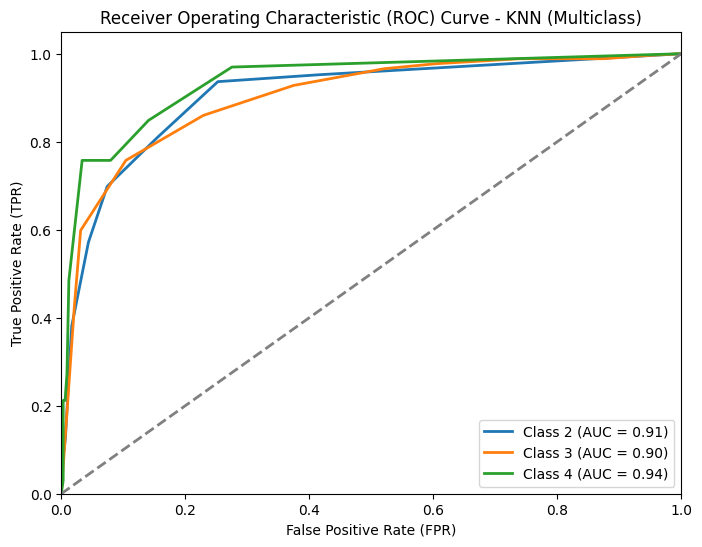

In [49]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt

# Train the KNN model
model_knn = KNeighborsClassifier(n_neighbors=10, metric='euclidean')
model_knn.fit(X_train, y_train)

# Predict on the test set
y_predict_knn = model_knn.predict(X_test)

# Print accuracy and classification report
print(accuracy_score(y_test, y_predict_knn))
print(classification_report(y_test, y_predict_knn))

# Get predicted probabilities for all classes
y_prob_knn = model_knn.predict_proba(X_test)

# Binarize the multiclass labels (One-vs-Rest for multiclass ROC)
y_test_bin = label_binarize(y_test, classes=[2, 3, 4])  # Adjust the classes based on your actual labels
n_classes = y_test_bin.shape[1]

# Initialize the plot
plt.figure(figsize=(8, 6))

# Compute and plot ROC curve for each class
for i in range(n_classes):
    fpr, tpr, thresholds = roc_curve(y_test_bin[:, i], y_prob_knn[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f'Class {i+2} (AUC = {roc_auc:.2f})')  # Adjust class labels if needed

# Plot the diagonal line (random classifier)
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')

# Customize the plot
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve - KNN (Multiclass)')
plt.legend(loc='lower right')
plt.show()


In [50]:
# Training the model
from sklearn.neural_network import MLPClassifier
model_mlp = MLPClassifier(hidden_layer_sizes=(100,100,100),batch_size=10,learning_rate_init=0.01,max_iter=2000,random_state=10)
model_mlp.fit(X_train,y_train)

MLPClassifier(batch_size=10, hidden_layer_sizes=(100, 100, 100),
              learning_rate_init=0.01, max_iter=2000, random_state=10)

In [51]:
# Predicting the model
y_predict_mlp = model_mlp.predict(X_test)

In [52]:
# Finding accuracy, precision, recall and confusion matrix
print(accuracy_score(y_test,y_predict_mlp))
print(classification_report(y_test,y_predict_mlp))

0.8777777777777778
              precision    recall  f1-score   support

           2       0.84      0.76      0.80        63
           3       0.91      0.94      0.92       264
           4       0.68      0.64      0.66        33

    accuracy                           0.88       360
   macro avg       0.81      0.78      0.79       360
weighted avg       0.88      0.88      0.88       360



In [53]:
confusion_matrix(y_test,y_predict_mlp)

array([[ 48,  13,   2],
       [  9, 247,   8],
       [  0,  12,  21]])

0.8777777777777778
              precision    recall  f1-score   support

           2       0.84      0.76      0.80        63
           3       0.91      0.94      0.92       264
           4       0.68      0.64      0.66        33

    accuracy                           0.88       360
   macro avg       0.81      0.78      0.79       360
weighted avg       0.88      0.88      0.88       360



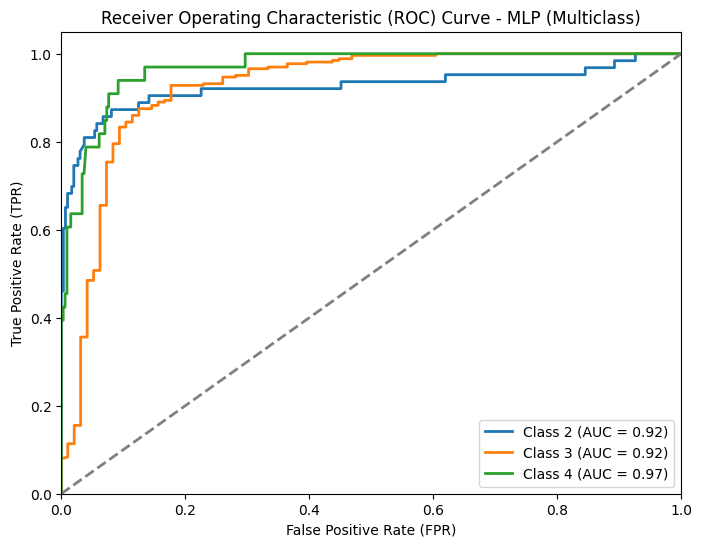

In [54]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt

# Train the MLP model
model_mlp = MLPClassifier(hidden_layer_sizes=(100, 100, 100), batch_size=10,
                          learning_rate_init=0.01, max_iter=2000, random_state=10)
model_mlp.fit(X_train, y_train)

# Predict on the test set
y_predict_mlp = model_mlp.predict(X_test)

# Print accuracy and classification report
print(accuracy_score(y_test, y_predict_mlp))
print(classification_report(y_test, y_predict_mlp))

# Get predicted probabilities for all classes
y_prob_mlp = model_mlp.predict_proba(X_test)

# Binarize the multiclass labels (One-vs-Rest for multiclass ROC)
y_test_bin = label_binarize(y_test, classes=[2, 3, 4])  # Adjust the classes based on your actual labels
n_classes = y_test_bin.shape[1]

# Initialize the plot
plt.figure(figsize=(8, 6))

# Compute and plot ROC curve for each class
for i in range(n_classes):
    fpr, tpr, thresholds = roc_curve(y_test_bin[:, i], y_prob_mlp[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f'Class {i+2} (AUC = {roc_auc:.2f})')  # Adjust class labels if needed

# Plot the diagonal line (random classifier)
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')

# Customize the plot
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve - MLP (Multiclass)')
plt.legend(loc='lower right')
plt.show()


In [55]:
import pandas as pd

# Example dataset (replace with your actual dataframe)
data = {
    'EmpNumber': ['E1001000', 'E1001006', 'E1001007', 'E1001009', 'E1001010'],
    'Age': [32, 47, 40, 41, 60],
    'Gender': ['Male', 'Male', 'Male', 'Male', 'Male'],
    'EducationBackground': ['Marketing', 'Marketing', 'Life Sciences', 'Human Resources', 'Marketing'],
    'MaritalStatus': ['Single', 'Single', 'Married', 'Divorced', 'Single'],
    'EmpDepartment': ['Sales', 'Sales', 'Sales', 'Human Resources', 'Sales'],
    'EmpJobRole': ['Sales Executive', 'Sales Executive', 'Sales Executive', 'Manager', 'Sales Executive'],
    'BusinessTravelFrequency': ['Travel_Rarely', 'Travel_Rarely', 'Travel_Frequently', 'Travel_Rarely', 'Travel_Rarely'],
    'DistanceFromHome': [10, 14, 5, 10, 16],
    'EmpEducationLevel': [3, 4, 4, 4, 4],
    'EmpRelationshipSatisfaction': [4, 4, 3, 2, 4],
    'TotalWorkExperienceInYears': [10, 20, 20, 23, 10],
    'TrainingTimesLastYear': [2, 2, 2, 2, 1],
    'EmpWorkLifeBalance': [2, 3, 3, 2, 3],
    'ExperienceYearsAtThisCompany': [10, 20, 20, 23, 10],
    'ExperienceYearsInCurrentRole': [7, 7, 13, 6, 2],
    'YearsSinceLastPromotion': [0, 1, 1, 12, 2],
    'YearsWithCurrManager': [8, 7, 12, 6, 2],
    'Attrition': ['No', 'No', 'No', 'No', 'No'],
    'PerformanceRating': [3, 3, 4, 3, 3]
}

df = pd.DataFrame(data)

# One-Hot Encoding
df_encoded = pd.get_dummies(df, drop_first=True)

# Display the encoded dataframe
print(df_encoded)

   Age  DistanceFromHome  EmpEducationLevel  EmpRelationshipSatisfaction  \
0   32                10                  3                            4   
1   47                14                  4                            4   
2   40                 5                  4                            3   
3   41                10                  4                            2   
4   60                16                  4                            4   

   TotalWorkExperienceInYears  TrainingTimesLastYear  EmpWorkLifeBalance  \
0                          10                      2                   2   
1                          20                      2                   3   
2                          20                      2                   3   
3                          23                      2                   2   
4                          10                      1                   3   

   ExperienceYearsAtThisCompany  ExperienceYearsInCurrentRole  \
0                    